---

# Vadi-Samvadi Based Classification

---

### Pitch Histogram
- Serves as an indicator of **vadi**, **samvadi**, and **vivadi** swaras.
- Also indicates whether a particular **svara** is **tivra**, **shuddha**, or **komal**.


In [2]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

## Load dataset

In [3]:
X = np.load('../dataset/counts.npy')
y = np.load('../dataset/labels.npy')
classes = np.load('../dataset/mappings.npy')

In [4]:
X = np.expand_dims(X, axis=-1)

In [5]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (36262, 73, 1)
y shape: (36262, 40)


## Train-test split

In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Model

In [7]:
x_input = keras.layers.Input(shape=(X.shape[1], X.shape[2]))

In [8]:
x = keras.layers.Conv1D(32, 5, activation='relu', padding='same')(x_input)
x = keras.layers.Conv1D(64, 5, activation='relu', padding='same')(x)
x = keras.layers.MaxPooling1D(pool_size=2)(x)
x = keras.layers.Dropout(0.25)(x)

x = keras.layers.Conv1D(32, 5, activation='relu', padding='same')(x_input)
x = keras.layers.Conv1D(64, 5, activation='relu', padding='same')(x)
x = keras.layers.MaxPooling1D(pool_size=2)(x)
x = keras.layers.Dropout(0.25)(x)

x = keras.layers.Conv1D(128, 3, activation='relu', padding='same')(x)
x = keras.layers.Conv1D(128, 3, activation='relu', padding='same')(x)
x = keras.layers.MaxPooling1D(pool_size=2)(x)
x = keras.layers.Dropout(0.25)(x)

I0000 00:00:1744491356.286984   21263 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [9]:
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.Dense(64, activation='relu')(x)

In [10]:
output = keras.layers.Dense(y.shape[1], activation='softmax')(x)

model = keras.models.Model(inputs=x_input, outputs=output)

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 73, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 73, 32)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 73, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 36, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 36, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 36, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 40)             │         2,600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 718,312 (2.74 MB)

 Trainable params: 718,312 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

## Train

In [13]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

Epoch 1/50
784/794 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3577 - loss: 2.1635

2025-04-12 22:56:12.574375: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1924', 8 bytes spill stores, 8 bytes spill loads



794/794 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3584 - loss: 2.1606

2025-04-12 22:56:15.459042: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_139', 4 bytes spill stores, 4 bytes spill loads

2025-04-12 22:56:15.534119: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_139', 12 bytes spill stores, 12 bytes spill loads

2025-04-12 22:56:17.149726: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_139', 4 bytes spill stores, 4 bytes spill loads

2025-04-12 22:56:17.442593: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_139', 12 bytes spill stores, 12 bytes spill loads



794/794 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.3585 - loss: 2.1603 - val_accuracy: 0.5507 - val_loss: 1.4354
Epoch 2/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5103 - loss: 1.5705 - val_accuracy: 0.5773 - val_loss: 1.3110
Epoch 3/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5575 - loss: 1.4237 - val_accuracy: 0.6244 - val_loss: 1.1799
Epoch 4/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5891 - loss: 1.2969 - val_accuracy: 0.6499 - val_loss: 1.1148
Epoch 5/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6130 - loss: 1.2247 - val_accuracy: 0.6613 - val_loss: 1.0604
Epoch 6/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6314 - loss: 1.1627 - val_accuracy: 0.6657 - val_loss: 1.0302
Epoch 7/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6435 - loss: 1.1314 - val_accuracy: 0.6867 - val_loss: 0.9904
Epoch 8/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6692 - loss: 1.0510 - val_accuracy: 0.6988 - val

In [14]:
# Save the model
model.save('../models/vadi_samvadi_model.keras')

## Test

In [15]:
# Load the arohana-avarohana model
model = keras.models.load_model('../models/vadi_samvadi_model.keras')

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)

170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7732 - loss: 0.7735


In [17]:
print(f'Test accuracy: {round(accuracy * 100, 2)}')

Test accuracy: 77.17


In [18]:
y_pred = model.predict(X_test)

170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [19]:
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='macro')
print(f'f1 score: {f1}')

f1 score: 0.757134659853105


In [20]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

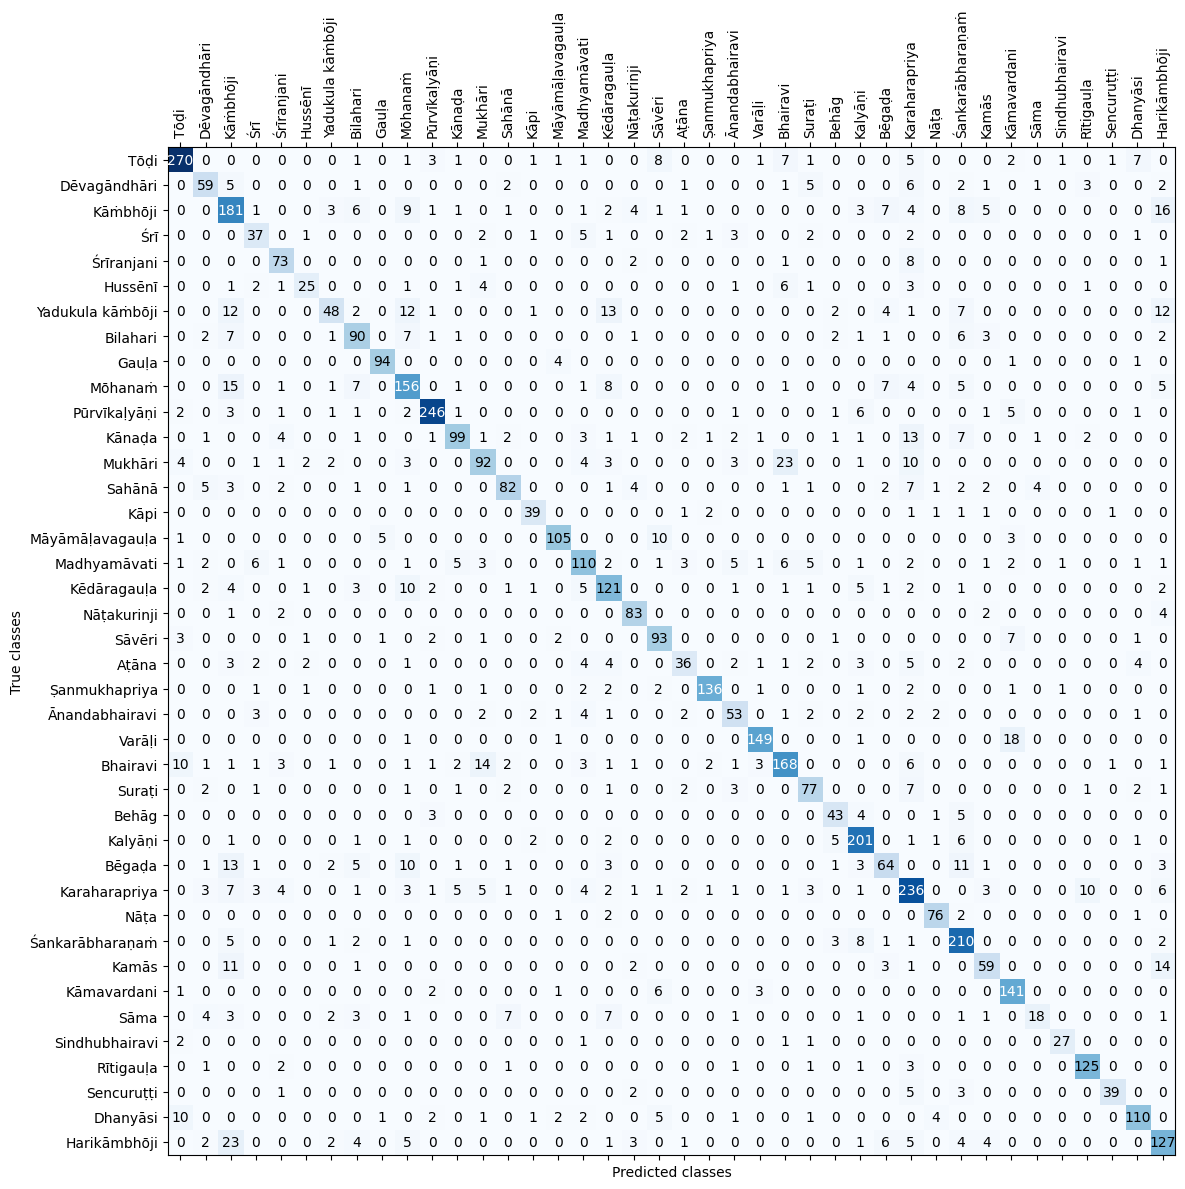

In [21]:
fig, ax = plt.subplots(figsize=(12, 12))
cax = ax.matshow(cm, cmap=plt.cm.Blues)

ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)

ax.set_xlabel('Predicted classes')
ax.set_ylabel('True classes')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = 'black' if cm[i, j] < max(cm.flatten()) / 2 else 'white'
        ax.text(j, i, cm[i, j], ha='center', va='center', color=color)

plt.savefig('../plots/confusion_matrix_histogram.png', dpi=300)
plt.tight_layout()
plt.show()

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
                  precision    recall  f1-score   support

            Tōḍi       0.89      0.87      0.88       312
    Dēvagāndhāri       0.69      0.66      0.68        89
        Kāṁbhōji       0.61      0.71      0.65       255
             Śrī       0.63      0.64      0.63        58
      Śrīranjani       0.76      0.85      0.80        86
         Hussēnī       0.76      0.53      0.62        47
Yadukula kāṁbōji       0.75      0.42      0.54       115
        Bilahari       0.69      0.72      0.71       125
           Gauḷa       0.93      0.94      0.94       100
         Mōhanaṁ       0.68      0.74      0.71       212
    Pūrvīkaḷyāṇi       0.92      0.90      0.91       272
          Kānaḍa       0.83      0.68      0.75       145
         Mukhāri       0.72      0.62      0.67       149
          Sahānā       0.80      0.69      0.74       119
            Kāpi       0.81      0.83      0.82        47
 Māyāmāḷavagauḷa       0.89   

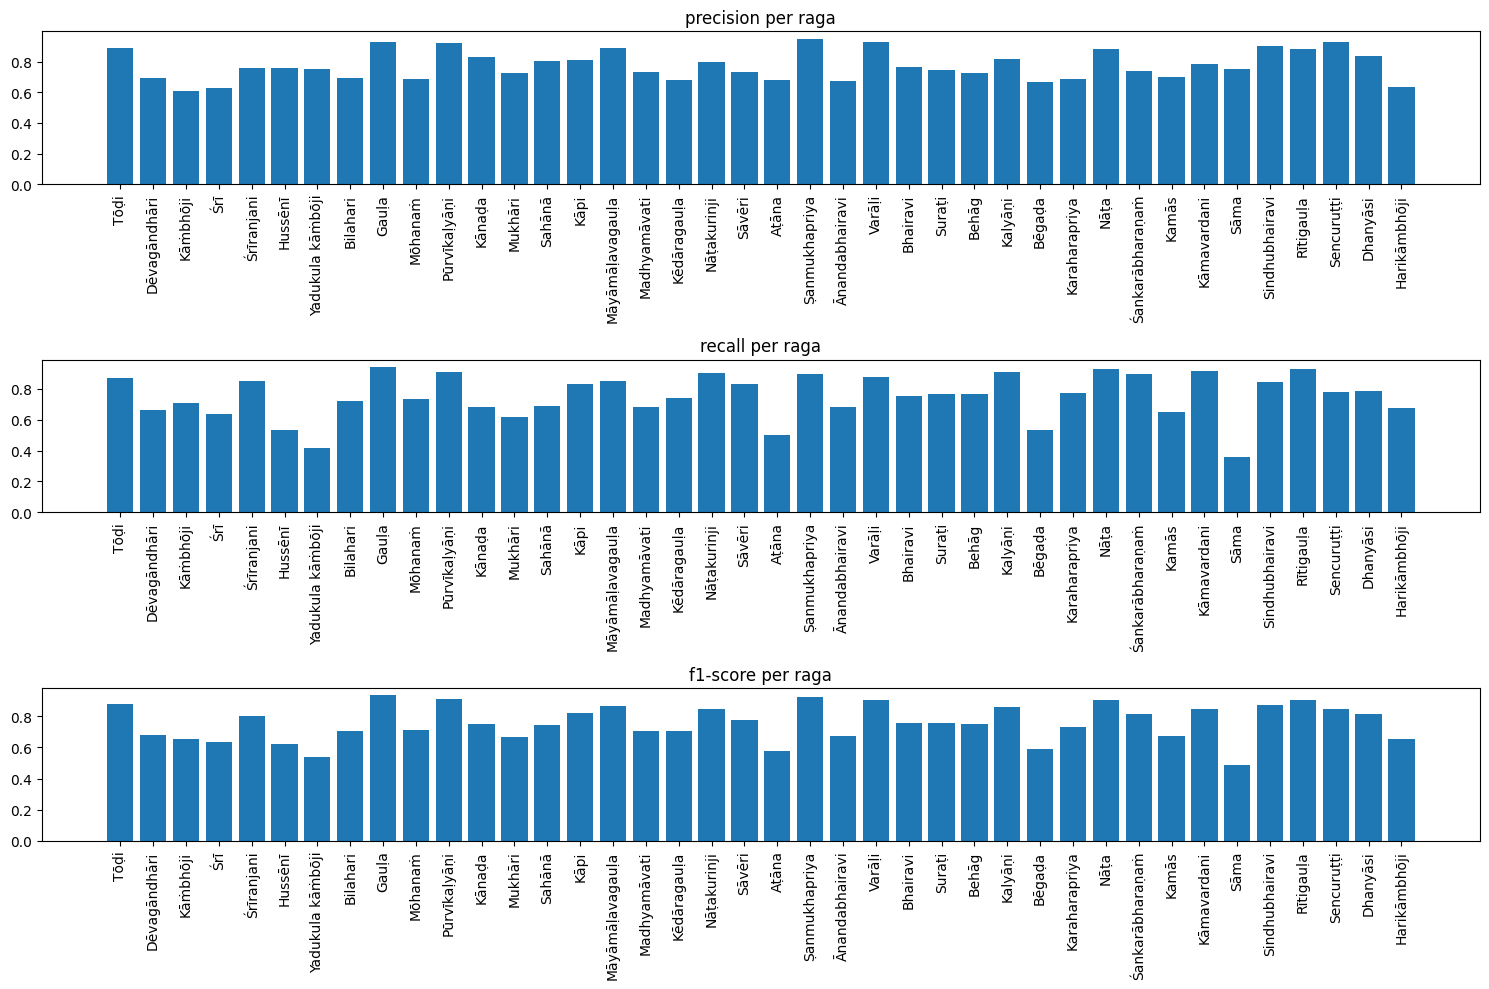

In [22]:
from sklearn.metrics import classification_report

# Get predictions
y_pred = model.predict(X_test)  # Fixed: model only takes one input
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=classes, output_dict=True)
print(classification_report(y_true_classes, y_pred_classes, target_names=classes))

# Plot precision, recall and f1-score for each class
metrics = ['precision', 'recall', 'f1-score']
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics):
    plt.subplot(3, 1, i+1)
    values = [report[raga][metric] for raga in classes]
    plt.bar(classes, values)
    plt.title(f'{metric} per raga')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../plots/metrics_per_class_vadi_samvadi.png', dpi=300)  # Changed filename to avoid overwriting
plt.show()